In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import statistics as st
from calendar import isleap

In [2]:
# Read Orography
OroData = xr.open_dataset('../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5IGP_Orography.nc')
OroD = OroData.sel(latitude=slice(32,24),longitude=slice(74,86))
# create mask
oro = OroD.z
oro.values = OroD.z.values/9.81
oro.attrs
oro.attrs['units']='meter'
oro.attrs['long_name']='Orography'
oro.values[oro.values>500.1]=np.NaN
mask=oro.values/oro.values

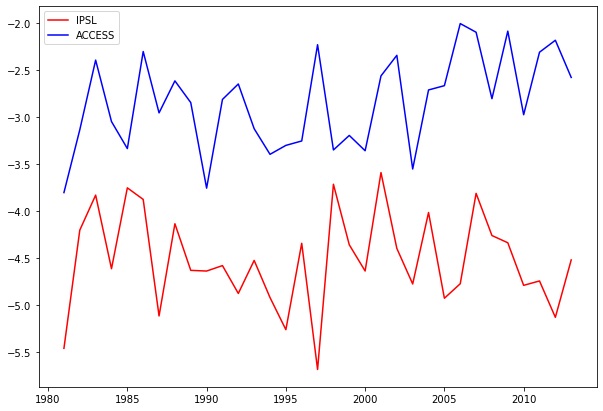

In [4]:
InvHistvals=[]
# Inv Data
rhData  = xr.open_dataset('../../Data/CMIP6/IPSL-CM6A-LR/NDJF/Regrid_NH_tas_NDJFday_IPSL-CM6A-LR_historical_r1i1p1f1_gr_18500101-20141231.nc')
tLevData = xr.open_dataset('../../Data/CMIP6/IPSL-CM6A-LR/NDJF/Regrid_NH_ta_NDJFday_IPSL-CM6A-LR_historical_r1i1p1f1_gr_18500101-20141231.nc')

t2mD = rhData.sel(latitude=slice(32,24),longitude=slice(74,86))
tLevD = tLevData.sel(latitude=slice(32,24),longitude=slice(74,86))

#Calculate inv
inv=tLevD.ta.sel(plev=85000,method='nearest').values-t2mD.tas.values
inv_ds = xr.Dataset({'inv': (('time','latitude','longitude'), inv)}, 
                    coords={'time': t2mD.time,'latitude': t2mD.latitude,'longitude': t2mD.longitude})
inv_ds.attrs
inv_ds.attrs['units']='K'
inv_ds.attrs['long_name']='t850 - t2m'

histInvIPSL=inv_ds.sel(latitude=slice(32,24),longitude=slice(74,86)).inv
#histInv[0].values
histInvIPSL[1].values
histInvIPSL.values=histInvIPSL.values*mask

# Area Average
InvTS1=histInvIPSL.mean(dim=['latitude','longitude'], skipna=True)
InvTs=(InvTS1[((InvTS1.time.dt.month>11) | (InvTS1.time.dt.month<2)) ].sel(time=slice('1980-12-1','2014-1-31')))
x=np.arange(1981,2014)
histInvTs=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T12:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T12:00:00')
   # print(EnDString)
    InvT=InvTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
    histInvTs.append(InvT.mean())
InvHistvals.append(histInvTs) 



# Inv Data
rhData  = xr.open_dataset('../../Data/CMIP6/ACCESS-CM2/tasNHRegrid_NDJFday_ACCESS-CM2_historical_r1i1p1f1_gn_19500101-20141231.nc')
tLevData = xr.open_dataset('../../Data/CMIP6/ACCESS-CM2/taNHRegrid_NDJFday_ACCESS-CM2_historical_r1i1p1f1_gn_19500101-20141231.nc')

t2mD = rhData.sel(latitude=slice(32,24),longitude=slice(74,86))
tLevD = tLevData.sel(latitude=slice(32,24),longitude=slice(74,86))

#Calculate inv
inv=tLevD.ta.sel(plev=85000,method='nearest').values-t2mD.tas.values
inv_ds = xr.Dataset({'inv': (('time','latitude','longitude'), inv)}, 
                    coords={'time': t2mD.time,'latitude': t2mD.latitude,'longitude': t2mD.longitude})
inv_ds.attrs
inv_ds.attrs['units']='K'
inv_ds.attrs['long_name']='t850 - t2m'

histInvACCESS=inv_ds.sel(latitude=slice(32,24),longitude=slice(74,86)).inv
#histInv[0].values
histInvACCESS[1].values
histInvACCESS.values=histInvACCESS.values*mask


# Area Average
InvTS1=histInvACCESS.mean(dim=['latitude','longitude'], skipna=True)

InvTs=(InvTS1[((InvTS1.time.dt.month>11) | (InvTS1.time.dt.month<2)) ].sel(time=slice('1980-12-1','2014-1-31')))
histInvTs=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T12:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T12:00:00')
   # print(EnDString)
    InvT=InvTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
    histInvTs.append(InvT.mean())
InvHistvals.append(histInvTs)
 


fig = plt.figure(figsize=(10,7))
plt.plot(x,InvHistvals[0],label='IPSL',color='Red')
plt.plot(x,InvHistvals[1],label='ACCESS',color='Blue')
#plt.plot(x,InvHistvals[2],label='EC-Earth3',color='Black')
plt.legend()

#plt.savefig('HistInv_Anthropogenic.eps')
plt.show()


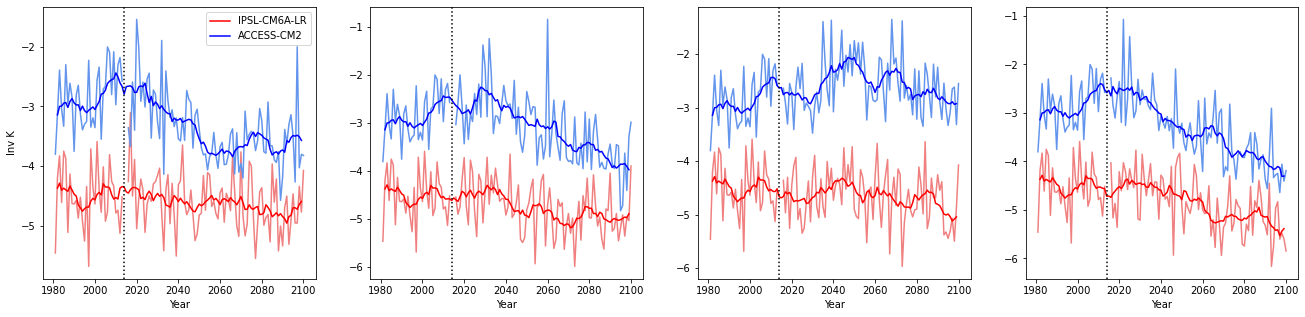

In [5]:
ssps=['126','245','370','585']
fig = plt.figure(figsize=(22.5,5))

i=1
for sp in ssps:
    
    x=np.arange(1981,2014)

    plt.subplot(1, 4, i)

    #plt.plot(x,EnsBCHist,label='Historical',color='gainsboro')
    plt.plot(x,InvHistvals[0],color='lightcoral')
    plt.plot(x,InvHistvals[1],color='cornflowerblue')
    x=np.arange(2016,2101)
    InvFut=[]
# Inv Data
    folderString='/home/cccr/diptih/dipti/Data/ssp'+sp+'/IPSL-CM6A-LR/processed/'
    
    rhData=xr.open_dataset(folderString+'Regrid_tas_day_IPSL-CM6A-LR_ssp'+sp+'_r1i1p1f1_gr_20150101-21001231.nc')
    tLevData=xr.open_dataset(folderString+'Regrid_ta_day_IPSL-CM6A-LR_ssp'+sp+'_r1i1p1f1_gr_20150101-21001231.nc')
   # tLevData = xr.open_dataset('../../Data/CMIP6/IPSL-CM6A-LR/NDJF/Regrid_NH_ta_NDJFday_IPSL-CM6A-LR_historical_r1i1p1f1_gr_18500101-20141231.nc')

    t2mD = rhData.sel(latitude=slice(32,24),longitude=slice(74,86))
    tLevD = tLevData.sel(latitude=slice(32,24),longitude=slice(74,86))

    #Calculate inv
    inv=tLevD.ta.sel(plev=85000,method='nearest').values-t2mD.tas.values
    inv_ds = xr.Dataset({'inv': (('time','latitude','longitude'), inv)}, 
                    coords={'time': t2mD.time,'latitude': t2mD.latitude,'longitude': t2mD.longitude})
    inv_ds.attrs
    inv_ds.attrs['units']='K'
    inv_ds.attrs['long_name']='t850 - t2m'
    # apply mask
    inv_ds.inv.values=inv_ds.inv.values*mask
    rhD  = inv_ds.inv.sel(latitude=slice(32,24),longitude=slice(74,86))


# Area Average
    InvTS1=rhD.mean(dim=['latitude','longitude'], skipna=True)

    InvTs=(InvTS1[((InvTS1.time.dt.month>11) | (InvTS1.time.dt.month<2)) ].sel(time=slice('2015-12-1','2100-1-31')))
    #x=np.arange(1981,2014)
    histInvTs=[]
    for yr in x :
        InDString=np.datetime64(str(yr-1)+'-12-01T12:00:00')
        EnDString=np.datetime64(str(yr)+'-01-31T12:00:00')
   # print(EnDString)
        InvT=InvTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
        histInvTs.append(InvT.mean())
    InvFut.append(histInvTs) 

    # Inv Data
    folderString='/home/cccr/diptih/dipti/Data/ssp'+sp+'/ACCESS-CM2/processed/'
    rhData=xr.open_dataset(folderString+'Regrid_tas_day_ACCESS-CM2_ssp'+sp+'_r1i1p1f1_gn_20150101-21001231.nc')
    tLevData=xr.open_dataset(folderString+'Regrid_ta_day_ACCESS-CM2_ssp'+sp+'_r1i1p1f1_gn_20150101-21001231.nc')
   # tLevData = xr.open_dataset('../../Data/CMIP6/IPSL-CM6A-LR/NDJF/Regrid_NH_ta_NDJFday_IPSL-CM6A-LR_historical_r1i1p1f1_gr_18500101-20141231.nc')

    t2mD = rhData.sel(latitude=slice(32,24),longitude=slice(74,86))
    tLevD = tLevData.sel(latitude=slice(32,24),longitude=slice(74,86))

    #Calculate inv
    inv=tLevD.ta.sel(plev=85000,method='nearest').values-t2mD.tas.values
    inv_ds = xr.Dataset({'inv': (('time','latitude','longitude'), inv)}, 
                    coords={'time': t2mD.time,'latitude': t2mD.latitude,'longitude': t2mD.longitude})
    inv_ds.attrs
    inv_ds.attrs['units']='K'
    inv_ds.attrs['long_name']='t850 - t2m'
    # apply mask
    inv_ds.inv.values=inv_ds.inv.values*mask
    rhD  = inv_ds.inv.sel(latitude=slice(32,24),longitude=slice(74,86))

# Area Average
    InvTS1=rhD.mean(dim=['latitude','longitude'], skipna=True)

    InvTs=(InvTS1[((InvTS1.time.dt.month>11) | (InvTS1.time.dt.month<2)) ].sel(time=slice('2015-12-1','2100-1-31')))
    histInvTs=[]
    for yr in x :
        InDString=np.datetime64(str(yr-1)+'-12-01T12:00:00')
        EnDString=np.datetime64(str(yr)+'-01-31T12:00:00')
   # print(EnDString)
        InvT=InvTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
        histInvTs.append(InvT.mean())
    InvFut.append(histInvTs)

    histInvTs=[]
    for yr in x :
        InDString=np.datetime64(str(yr-1)+'-12-01T00:00:00')
        EnDString=np.datetime64(str(yr)+'-01-31T00:00:00')
   # print(EnDString)
        InvT=InvTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
        histInvTs.append(InvT.mean())
    InvFut.append(histInvTs)
    plt.plot(x,InvFut[0],color='lightcoral')
    jointList=InvHistvals[0]+InvFut[0]
    S = pd.Series (jointList)
    xTotal=np.arange(1982,2100)
    rENS=S.rolling(10, center=True, min_periods=1).mean()
    plt.plot(xTotal,rENS,label='IPSL-CM6A-LR',color='red')
    plt.plot(x,InvFut[1],color='cornflowerblue')
    jointList=InvHistvals[1]+InvFut[1]
    S = pd.Series (jointList)
    xTotal=np.arange(1982,2100)
    rENS=S.rolling(10, center=True, min_periods=1).mean()
    plt.plot(xTotal,rENS,label='ACCESS-CM2',color='blue')
    #plt.ylim(284,298)
    plt.axvline(x=2014,color='black',linestyle=':')
    plt.xlabel('Year') 
    if i == 1:
        plt.legend()
        plt.ylabel('Inv K')
    i=i+1

#plt.savefig('Models_Inv_10YearMean.eps')
plt.show()
        